### Heater Automation 
### Modify the inlet stream parameters or properties to simulate different feed conditions affecting the heaters performance
### Vary input parameters, Change Feed temperature and pressure,varying efficiency, compare output values with graphs

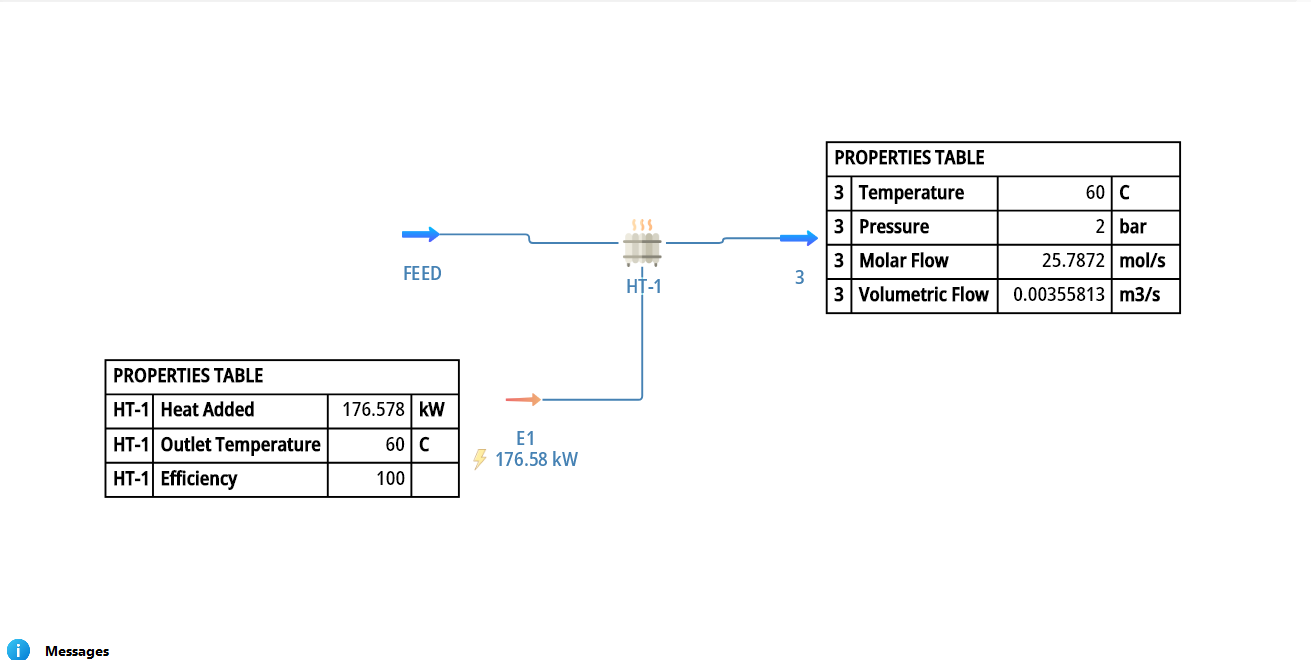

In [1]:
from IPython.display import display
from PIL import Image
Basis_image = Image.open("C:/Users/VCI RG/OneDrive/Desktop/DWSIM simulation/6. Heater/h-1.png")
display(Basis_image)

In [2]:
import clr
import System
import pythoncom
import os
from System.IO import Directory, Path
from System import String, Environment



In [3]:
pythoncom.CoInitialize()
dwSimPath = r"C:/Users/VCI RG/AppData/Local/DWSIM/"

clr.AddReference(dwSimPath + "CapeOpen.dll")
clr.AddReference(dwSimPath + "DWSIM.Automation.dll")
clr.AddReference(dwSimPath + "DWSIM.Interfaces.dll")
clr.AddReference(dwSimPath + "DWSIM.GlobalSettings.dll")
clr.AddReference(dwSimPath + "DWSIM.SharedClasses.dll")
clr.AddReference(dwSimPath + "DWSIM.Thermodynamics.dll")
clr.AddReference(dwSimPath + "DWSIM.UnitOperations.dll")
clr.AddReference(dwSimPath + "DWSIM.Inspector.dll")
clr.AddReference(dwSimPath + "System.Buffers.dll")


from DWSIM.Interfaces.Enums.GraphicObjects import ObjectType
from DWSIM.Thermodynamics import Streams,PropertyPackages
from DWSIM.UnitOperations import UnitOperations
from DWSIM.Automation import Automation3
from DWSIM.GlobalSettings import Settings

Directory.SetCurrentDirectory(dwSimPath)



In [4]:
interf = Automation3()
FileName = Path.Combine("C:/Users/VCI RG/OneDrive/Desktop/DWSIM simulation/6. Heater/Heater.dwxml")
sim = interf.LoadFlowsheet(FileName)

## Heater Properties

In [5]:
Heater = sim.GetObject("HT-1")
Heater = Heater.GetAsObject()

print(f"The change in temperature : {Heater.DeltaT} C")
print(f"The efficiency of heater: {Heater.Efficiency}")
print(f"The outlet temperature: {Heater.OutletTemperature} K")
print(f"Heat duty: {Heater.get_HeatDuty()} kW")

# print(dir(Heater)) --> To print all the methods and properties related to unit operation that is heater.






The change in temperature : 35.0 C
The efficiency of heater: 100.0
The outlet temperature: 333.15 K
Heat duty: 176.577851906204 kW
['__abs__', '__add__', '__and__', '__bool__', '__ceil__', '__class__', '__delattr__', '__dir__', '__divmod__', '__doc__', '__eq__', '__float__', '__floor__', '__floordiv__', '__format__', '__ge__', '__getattribute__', '__getnewargs__', '__getstate__', '__gt__', '__hash__', '__index__', '__init__', '__init_subclass__', '__int__', '__invert__', '__le__', '__lshift__', '__lt__', '__mod__', '__mul__', '__ne__', '__neg__', '__new__', '__or__', '__pos__', '__pow__', '__radd__', '__rand__', '__rdivmod__', '__reduce__', '__reduce_ex__', '__repr__', '__rfloordiv__', '__rlshift__', '__rmod__', '__rmul__', '__ror__', '__round__', '__rpow__', '__rrshift__', '__rshift__', '__rsub__', '__rtruediv__', '__rxor__', '__setattr__', '__sizeof__', '__str__', '__sub__', '__subclasshook__', '__truediv__', '__trunc__', '__xor__', 'as_integer_ratio', 'bit_count', 'bit_length', 'con

## FEED properties 

In [6]:
Feed = sim.GetObject("FEED")
Feed = Feed.GetAsObject()

print(f"The feed contains: {list(Feed.GetCompoundNames())}")
print(f"The pressure of feed is:{Feed.GetPressure()} Pa")
print(f"The temperature of feed is: {Feed.GetTemperature()} K")

# print(dir(Feed)) --> to print all the method and property related to Feed.  


The feed contains: ['N-hexane']
The pressure of feed is:200000.0 Pa
The temperature of feed is: 298.15 K


## Outlet Properties

In [7]:
Outlet = sim.GetObject("3")
Outlet = Outlet.GetAsObject()

print(f"The outlet feed contains: {list(Outlet.GetCompoundNames())}")
print(f"The pressure of feed is: {Outlet.GetPressure()} Pa")
print(f"The temperature of feed is: {Outlet.GetTemperature()} K")

# print(dir(Outlet)) --> To print all the method and property related to outlet.

The outlet feed contains: ['N-hexane']
The pressure of feed is: 200000.0 Pa
The temperature of feed is: 333.149999997462 K


## Code for writing varying input parameters with output parameters

In [8]:
import clr
import System
import pythoncom
import os
from System.IO import Directory, Path
from System import String, Environment
from DWSIM.Interfaces.Enums.GraphicObjects import ObjectType
from DWSIM.Thermodynamics import Streams, PropertyPackages
from DWSIM.UnitOperations import UnitOperations
from DWSIM.Automation import Automation3
from DWSIM.GlobalSettings import Settings
from tabulate import tabulate

# Initialize COM
pythoncom.CoInitialize()

# Set DWSIM path and load references
dwSimPath = r"C:/Users/VCI RG/AppData/Local/DWSIM/"
dlls = [
    "CapeOpen.dll",
    "DWSIM.Automation.dll",
    "DWSIM.Interfaces.dll",
    "DWSIM.GlobalSettings.dll",
    "DWSIM.SharedClasses.dll",
    "DWSIM.Thermodynamics.dll",
    "DWSIM.UnitOperations.dll",
    "DWSIM.Inspector.dll",
    "System.Buffers.dll"
]
for dll in dlls:
    try:
        clr.AddReference(os.path.join(dwSimPath, dll))
    except Exception as e:
        print(f"Error loading {dll}: {e}")
        raise

Directory.SetCurrentDirectory(dwSimPath)

# Initialize automation interface and load flowsheet
interf = Automation3()
fileNameToLoad = Path.Combine(r"C:\Users\VCI RG\OneDrive\Desktop\DWSIM simulation\6. Heater\Heater.dwxml")
sim = interf.LoadFlowsheet(fileNameToLoad)
if sim is None:
    raise Exception(f"Failed to load flowsheet: {fileNameToLoad}")

# Set solver mode
Settings.SolverMode = 0

def get_dwsObject(sim, name):
    obj = sim.GetObject(name)
    if obj is None:
        raise Exception(f"Object '{name}' not found in flowsheet.")
    obj_instance = obj.GetAsObject()
    if obj_instance is None:
        raise Exception(f"Failed to get object '{name}'. Verify object type.")
    return obj_instance

try:
    Heater = get_dwsObject(sim, "HT-1")
    Inlet_Stream = get_dwsObject(sim, "FEED")
    outlet_stream = get_dwsObject(sim, "3")
    heat_q = Heater.get_HeatDuty()
except Exception as e:
    print(f"Error accessing object: {e}")
    raise

# Get initial temperature and target temperature
Target_temperature = float(input("Enter the desired temperature for feed (K): "))
initial_Temp = Inlet_Stream.GetTemperature()
Inlet_Temperature = initial_Temp
Outlet_initial_Temperature = outlet_stream.GetTemperature()
Heater_Outlet_Temperature = Outlet_initial_Temperature
initial_heatq = Heater.get_HeatDuty()
Heat_Duty = initial_heatq

# Define iteration and step size
Iteration = 20
Step_size = (Target_temperature - initial_Temp) / Iteration  # Incremental step to reach target temperature

Results = []
headers = ["Iteration", "Inlet_Temperature (K)", "Heater_Outlet_Temperature (K)", "Heat_Duty (kW)"]

for i in range(Iteration):
    # Update inlet temperature for this iteration
    Inlet_Temperature = initial_Temp + (i * Step_size)
    Inlet_Stream.SetTemperature(Inlet_Temperature)

    # Recalculate the flowsheet
    errors = interf.CalculateFlowsheet2(sim)
    if errors:
        print(f"Simulation errors in iteration {i+1}: {errors}")
        break

    # Get current outlet temperature and heat duty
    try:
        Heater_Outlet_Temperature = outlet_stream.GetTemperature()  # Use outlet stream temperature
        Heat_Duty = Heater.get_HeatDuty()
    except Exception as e:
        print(f"Error retrieving data in iteration {i+1}: {e}")
        break

    # Store results
    Results.append([i+1, Inlet_Temperature, Heater_Outlet_Temperature, Heat_Duty])

    # Print results for this iteration
    print(tabulate(Results, headers=headers, tablefmt="grid"))

# Clean up
pythoncom.CoUninitialize()

    

    

       
    
        
    

    
    
    



    




    
    

    






Enter the desired temperature for feed (K):  300


+-------------+-------------------------+---------------------------------+------------------+
|   Iteration |   Inlet_Temperature (K) |   Heater_Outlet_Temperature (K) |   Heat_Duty (kW) |
+=============+=========================+=================================+==================+
|           1 |                  298.15 |                          333.15 |          176.578 |
+-------------+-------------------------+---------------------------------+------------------+
+-------------+-------------------------+---------------------------------+------------------+
|   Iteration |   Inlet_Temperature (K) |   Heater_Outlet_Temperature (K) |   Heat_Duty (kW) |
+=============+=========================+=================================+==================+
|           1 |                 298.15  |                          333.15 |          176.578 |
+-------------+-------------------------+---------------------------------+------------------+
|           2 |                 298.242 |         

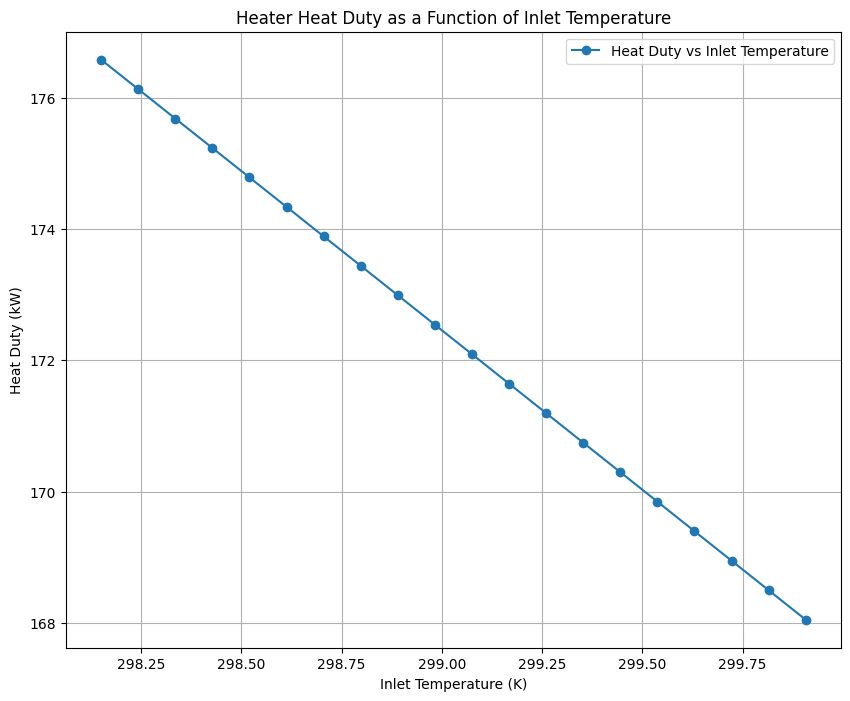

In [14]:
fig, axs = plt.subplots(1, 1, figsize=(10, 8))
inlet_temps = [row[1] for row in Results]  # Extract Inlet_Temperature from Results
heat_duties = [row[3] for row in Results]  # Extract Heat_Duty from Results
axs.plot(inlet_temps, heat_duties, label="Heat Duty vs Inlet Temperature", marker='o')
axs.set_xlabel("Inlet Temperature (K)")
axs.set_ylabel("Heat Duty (kW)")
axs.set_title("Heater Heat Duty as a Function of Inlet Temperature")
axs.legend()
axs.grid(True)
plt.show()